In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
import itertools
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML

In [2]:
trainfakenews_file = "./data/trainfakenewsdata.csv"

In [3]:
trainfakenews_df = pd.read_csv(trainfakenews_file)
comment_words = ' '
stopwords = set(STOPWORDS)
trainfakenews_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
trainfakenews_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
trainfakenews_df = trainfakenews_df.dropna()

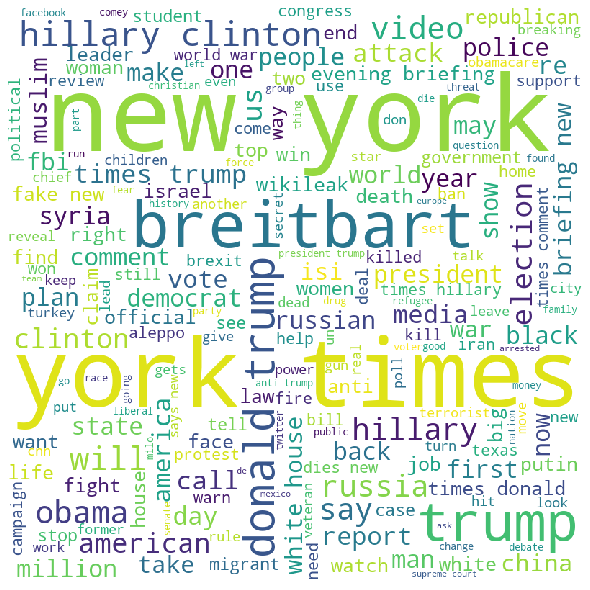

In [6]:
for val in trainfakenews_df.title: 
      
    #Typecaste each val to string 
    val = str(val) 
  
    #Split the value 
    tokens = val.split() 
      
    #Convert each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
#Plot WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
#Set y
y = trainfakenews_df.label 

#Drop the label column
trainfakenews_df.drop("label", axis=1)

#Set X
X = trainfakenews_df['title']

#Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)

In [8]:
#Initialize the count vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

#Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

#Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [9]:
#Initialize the Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 93.02%
Confusion matrix


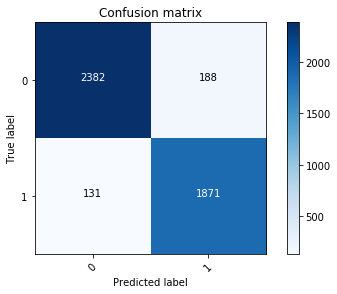

In [28]:
#PAC w/ Count

#Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(count_train,y_train)

#Predict on the test set and calculate accuracy
y_pred = pac.predict(count_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

#Plot the confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 92.37%
Confusion matrix


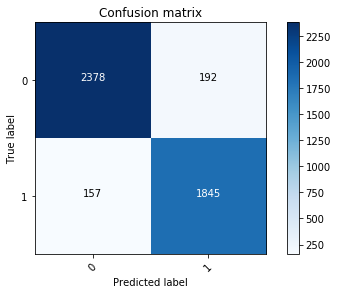

In [11]:
#PAC w/ Tfidf

#Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

#Plot the confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 89.65%
Confusion matrix


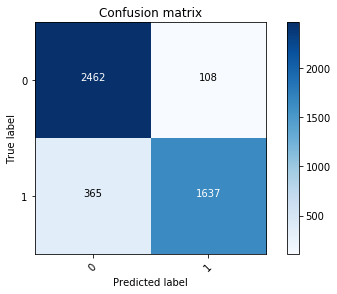

In [13]:
#MNB w/ Count

clf = MultinomialNB()
clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])


Accuracy: 84.67%
Confusion matrix


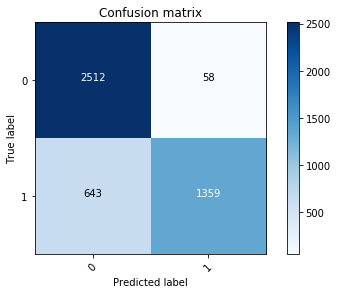

In [29]:
#MNB w/ Tfidf

clf = MultinomialNB()
clf.fit(tfidf_train, y_train)

pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 93.02%
Confusion matrix


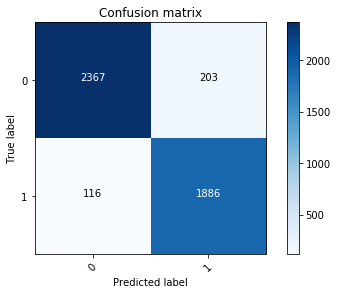

In [32]:
#LR w/ Count

logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)

y_logpred = logreg.predict(count_test)
score = metrics.accuracy_score(y_test, y_logpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_logpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 92.72%
Confusion matrix


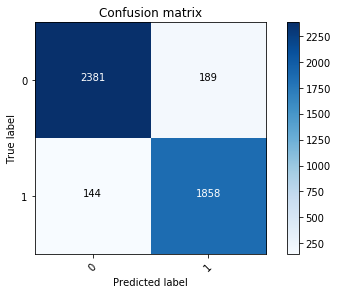

In [16]:
#LR w/ Tfidf

logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)

y_logpred = logreg.predict(tfidf_test)
score = metrics.accuracy_score(y_test, y_logpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_logpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 90.68%
Confusion matrix


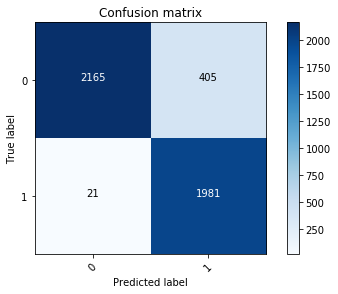

In [33]:
#ABC w/ Count

Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(count_train, y_train)

y_adabpred = Adab.predict(count_test)
score = metrics.accuracy_score(y_test, y_adabpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_adabpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 90.62%
Confusion matrix


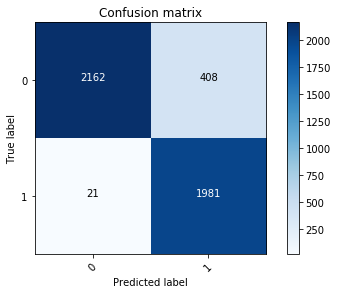

In [17]:
#ABC w/ Tfidf

Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(tfidf_train, y_train)

y_adabpred = Adab.predict(tfidf_test)
score = metrics.accuracy_score(y_test, y_adabpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_adabpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [35]:
pipelog = Pipeline([('ct', CountVectorizer()),('log', LogisticRegression())])
pipelog.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ct',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('log',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                            

In [36]:
pipepassive = Pipeline([('ct', CountVectorizer()),('pac', PassiveAggressiveClassifier())])
pipepassive.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ct',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('pac',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
                                             fit_intercept=True, loss='hinge',
                                    

In [54]:
log_param = {
    'log__C': [10.5,11,11.5],
    'ct__max_features': [9000,9250,9500],
    'log__penalty': ['l1','l2'],
    'ct__ngram_range': [(1,1),(1,2),(1,3)]
}

pac_param = {
    'pac__C': [10.5,11,11.5],
    'ct__max_features': [9000,9250,9500],
    'ct__ngram_range': [(1,1),(1,2),(1,3)]
}

In [55]:
gridlog = GridSearchCV(pipelog, log_param, verbose=2, n_jobs= -1)
gridpac = GridSearchCV(pipepassive, pac_param, verbose=2, n_jobs= -1)

In [56]:
gridlog.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.9min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [57]:
gridpac.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [58]:
gridlog.best_params_

{'ct__max_features': 9250,
 'ct__ngram_range': (1, 3),
 'log__C': 10.5,
 'log__penalty': 'l2'}

In [59]:
gridpac.best_params_

{'ct__max_features': 9000, 'ct__ngram_range': (1, 1), 'pac__C': 11}

In [60]:
best_log = gridlog.best_estimator_
y_best_log= best_log.predict(X_test)
best_score = metrics.accuracy_score(y_test, y_best_log)
print(f'Accuracy: {round(best_score*100,2)}%')

Accuracy: 93.96%


In [61]:
best_pac = gridpac.best_estimator_
y_best_pac= best_pac.predict(X_test)
best_score = metrics.accuracy_score(y_test, y_best_pac)
print(f'Accuracy: {round(best_score*100,2)}%')

Accuracy: 93.04%
